# Machine Learning - Assignment 3

## Artificial Neural Network

The aim of the assignment is to implement an artificial neural network (mostly) from scratch. This includes implementing or fixing the following:

* Add support for additional activation functions and their derivatives.
* Add support for loss functions and their derivative.
* Add the use of a bias in the forward propagation.
* Add the use of a bias in the backward propagation.

In addition, you will we doing the following as well:

* Test the algorithm on 3 datasets.
* Compare neural networks with and without scaling.
* Hyper-parameter tuning.

The forward and backward propagation is made to work through a single layer, and are re-used multiple times to work for multiple layers.

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the implementation.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, you might find yourself going back and and forth to change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries.

**IMPORTANT NOTE:** You may not import any more libraries than the ones already imported!

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We set seed to better reproduce results later on.
np.random.seed(12345)

## Neural Network utility functions

### 1) Activation functions

Below is some setup for choosing activation function. Implement 2 additional activation functions, "ReLU" and one more of your choosing.

In [19]:
# Activation functions
def activate(activations, selected_function = "none", alpha = 1):
    
    if selected_function == "none":
        y = activations
    elif selected_function == "relu" :
        y = np.maximum(0, activations)
    elif selected_function == "isrlu" :
        y = np.where(activations >= 0, activations, activations / np.sqrt(1 + alpha * activations ** 2))
    return y

In [20]:
# Test activation functions
print("NO ACTIVATION FUNCTION")
print(f"  activate(5)  = {activate(np.float64(5), 'none')}")
print(f"  activate(-5) = {activate(np.float64(-5), 'none')}")
print()
print("ReLU FUNCTION")
print(f"  activate(5)  = {activate(np.float64(5), 'relu')}")
print(f"  activate(-5) = {activate(np.float64(-5), 'relu')}")
print(f"  activate(0)  = {activate(np.float64(0), 'relu')}")
print()
print("ISRLU FUNCTION (alpha=1)")
print(f"  activate(5)  = {activate(np.float64(5), 'isrlu')}")
print(f"  activate(-5) = {activate(np.float64(-5), 'isrlu')}")
print(f"  activate(0)  = {activate(np.float64(0), 'isrlu')}")
print()
print("ISRLU FUNCTION (alpha=3)")
print(f"  activate(5)  = {activate(np.float64(5), 'isrlu', alpha=3)}")
print(f"  activate(-5) = {activate(np.float64(-5), 'isrlu', alpha=3)}")

NO ACTIVATION FUNCTION
  activate(5)  = 5.0
  activate(-5) = -5.0

ReLU FUNCTION
  activate(5)  = 5.0
  activate(-5) = 0.0
  activate(0)  = 0.0

ISRLU FUNCTION (alpha=1)
  activate(5)  = 5.0
  activate(-5) = -0.9805806756909202
  activate(0)  = 0.0

ISRLU FUNCTION (alpha=3)
  activate(5)  = 5.0
  activate(-5) = -0.5735393346764044


### 2) Activation function derivatives

Neural networks need both the activation function and its derivative. Finish the code below.

In [21]:
def d_activate(activations, selected_function = "none", alpha = 1):
    if selected_function == "none":
        dy = np.ones_like(activations)
    elif selected_function == "relu":
        dy = np.where(activations > 0, 1.0, 0.0)
    elif selected_function == "isrlu" :
        dy = np.where(activations >= 0, 1.0, (1.0 / (1.0 + alpha * activations ** 2)) ** 1.5)
    return dy

In [22]:
print("NO ACTIVATION FUNCTION")
print(f"  d_activate(5)  = {d_activate(np.float64(5), 'none')}")
print(f"  d_activate(-5) = {d_activate(np.float64(-5), 'none')}")
print()
print("ReLU FUNCTION")
print(f"  d_activate(5)  = {d_activate(np.float64(5), 'relu')}")
print(f"  d_activate(-5) = {d_activate(np.float64(-5), 'relu')}")
print(f"  d_activate(0)  = {d_activate(np.float64(0), 'relu')}")
print()
print("ISRLU FUNCTION (alpha=1)")
print(f"  d_activate(5)  = {d_activate(np.float64(5), 'isrlu')}")
print(f"  d_activate(-5) = {d_activate(np.float64(-5), 'isrlu')}")
print(f"  d_activate(0)  = {d_activate(np.float64(0), 'isrlu')}")
print()
print("ISRLU FUNCTION (alpha=3)")
print(f"  d_activate(5)  = {d_activate(np.float64(5), 'isrlu', alpha=3)}")
print(f"  d_activate(-5) = {d_activate(np.float64(-5), 'isrlu', alpha=3)}")

NO ACTIVATION FUNCTION
  d_activate(5)  = 1.0
  d_activate(-5) = 1.0

ReLU FUNCTION
  d_activate(5)  = 1.0
  d_activate(-5) = 0.0
  d_activate(0)  = 0.0

ISRLU FUNCTION (alpha=1)
  d_activate(5)  = 1.0
  d_activate(-5) = 0.00754292827454554
  d_activate(0)  = 1.0

ISRLU FUNCTION (alpha=3)
  d_activate(5)  = 1.0
  d_activate(-5) = 0.0015093140386221167


### 3) Loss functions

To penalize the network when it predicts incorrect, we need to meassure how "bad" the prediction is. This is done with loss-functions.

Similar as with the activation functions, the loss function needs its derivative as well.

Finish the MSE_loss (Mean Squared Error loss), as well as adding one additional loss function.

In [ ]:
# This is the loss for a set of predictions y_hat compared to a set of real valyes y
def MSE_loss(y_hat, y):
    loss = np.mean((y - y_hat) ** 2)
    return loss


def BCE_loss(y_hat, y):
    eps = 1e-15
    y_hat = np.clip(y_hat, eps, 1 - eps)
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

The derivatives of the loss is with respect to the predicted value **y_hat**.

In [24]:
def d_MSE_loss(y_hat, y):
    dy = 2 * (y_hat - y) / y.shape[0]
    return dy

def d_BCE_loss(y_hat, y):
    eps = 1e-15
    y_hat = np.clip(y_hat, eps, 1 - eps)
    dy = (-y / y_hat + (1 - y) / (1 - y_hat)) / y.shape[0]
    return dy

y_true = np.array([[1], [0], [1], [0]])
y_pred = np.array([[0.9], [0.1], [0.8], [0.2]])
print("MSE Loss")
print(f"  loss = {MSE_loss(y_pred, y_true):.6f}")
print(f"  d_loss = {d_MSE_loss(y_pred, y_true).flatten()}")
print()
print("BCE Loss")
print(f"  loss = {BCE_loss(y_pred, y_true):.6f}")
print(f"  d_loss = {d_BCE_loss(y_pred, y_true).flatten()}")

MSE Loss
  loss = 0.025000
  d_loss = [-0.05  0.05 -0.1   0.1 ]

BCE Loss
  loss = 0.164252
  d_loss = [-0.27777778  0.27777778 -0.3125      0.3125    ]


### 4) Forward propagation

The first "fundamental" function for neural networks is to be able to propagate the data forward through the neural network. We will implement this function here.

In [ ]:
def propagate_forward(weights, activations, bias, activation_function="none", alpha=1):
    dot_product = np.dot(activations, weights) + bias
    new_activations = activate(dot_product, activation_function, alpha=alpha)
    return new_activations

### 5) Back-propagation

To be able to train a neural network, we need to be able to propagate the loss backwards and update the weights. We will implement this function here.

In [26]:
def propagate_backward(weights, activations, bias, dl_dz, activation_function="none", alpha=1):
    dot_product = np.dot(activations, weights) + bias

    d_loss = d_activate(dot_product, activation_function, alpha) * dl_dz

    act_2d = np.atleast_2d(activations)
    dl_2d = np.atleast_2d(d_loss)
    d_weights = np.dot(act_2d.T, dl_2d)
    d_activations = np.dot(d_loss, weights.T)
    d_bias = np.sum(d_loss, axis=0)

    return d_weights, d_activations, d_bias

w_test = np.array([[0.2, 0.4], [0.6, 0.8]])
a_test = np.array([[1.0, 2.0]])
b_test = np.array([0.5, 0.5])
dl_test = np.array([[0.1, 0.2]])

fwd = propagate_forward(w_test, a_test, b_test, activation_function='relu')
print(f"Forward (ReLU):  {fwd}")

dw, da, db = propagate_backward(w_test, a_test, b_test, dl_test, activation_function='relu')
print(f"d_weights:\n{dw}")
print(f"d_activations: {da}")
print(f"d_bias: {db}")

Forward (ReLU):  [[1.9 2.5]]
d_weights:
[[0.1 0.2]
 [0.2 0.4]]
d_activations: [[0.1  0.22]]
d_bias: [0.1 0.2]


## Neural network implementation

### 6) Fixing the neural network

Below is a class implementation of a MLP neural network. This implementation is still lacking several areas that are needed for the network to be robust and function well. Your task is to improve and fix it with the following:

1. Add a bias to the activation functions, and make sure the bias is also updated during training. 
2. Add a function that trains the network using minibatches (such that the neural network trains on a few samples at a time). 
3. Make use of an validation set in the training function. The model should stop training when the loss starts to increase for the validatin set. This feature should be able to be turned on and off to test the difference.


In [ ]:
class NeuralNet(object):
    
    def __init__ (self, input_dim, output_dim, neurons = []):
        self.weights = [np.random.normal(0,0.5,(n,m)) for n,m in
                        zip([input_dim] + neurons, neurons + [output_dim])]
        
        self.biases = [np.zeros(m) for m in neurons + [output_dim]]
        
        self.activation_functions = ["relu"] * len(neurons) + ["none"]
    
    
    def forward(self, x):
        for layer_weights, bias, layer_activation_function in zip(self.weights, self.biases, self.activation_functions):
            x = propagate_forward(layer_weights, x, bias, layer_activation_function)
        return x
    
    
    def adjust_weights(self, x, y, learning_rate=1e-4):
        activation = x
        activation_history = []
        
        for layer_weights, bias, layer_activation_function in zip(self.weights, self.biases, self.activation_functions):
            activation_history.append(activation)
            activation = propagate_forward(layer_weights, activation, bias, layer_activation_function)
        
        loss = MSE_loss(activation,y)
        d_activations = d_MSE_loss(activation,y)
        
        for i, (layer_weights, bias, layer_activation_function, prev_act) in enumerate(reversed(list(zip(self.weights, self.biases, self.activation_functions, activation_history)))):

            d_weights, d_activations, d_bias = propagate_backward(layer_weights, prev_act, bias, d_activations, layer_activation_function)
            
            layer_weights -= learning_rate * d_weights
            bias -= learning_rate * d_bias
        
        return loss
    
    
    def train_net(self, x, y, batch_size=32, epochs=100, learning_rate=1e-4, use_validation_data=False, validation_split=0.2, patience=10):
        
        train_losses = []
        val_losses = []
        
        if use_validation_data:
            n_val = int(len(x) * validation_split)
            idx = np.random.permutation(len(x))
            x_val, y_val = x[idx[:n_val]], y[idx[:n_val]]
            x_train, y_train = x[idx[n_val:]], y[idx[n_val:]]
            best_val_loss = np.inf
            patience_counter = 0
            best_weights = [w.copy() for w in self.weights]
            best_biases  = [b.copy() for b in self.biases]
        else:
            x_train, y_train = x, y
        
        for epoch in range(epochs):
            perm = np.random.permutation(len(x_train))
            x_shuf = x_train[perm]
            y_shuf = y_train[perm]
            
            batch_losses = []
            for start in range(0, len(x_train), batch_size):
                x_batch = x_shuf[start:start + batch_size]
                y_batch = y_shuf[start:start + batch_size]
                batch_losses.append(self.adjust_weights(x_batch, y_batch, learning_rate))
            
            train_losses.append(np.mean(batch_losses))
            
            if use_validation_data:
                v_loss = MSE_loss(self.forward(x_val), y_val)
                val_losses.append(v_loss)
                if v_loss < best_val_loss:
                    best_val_loss = v_loss
                    patience_counter = 0
                    best_weights = [w.copy() for w in self.weights]
                    best_biases  = [b.copy() for b in self.biases]
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        self.weights = best_weights
                        self.biases  = best_biases
                        break
        
        if use_validation_data:
            return train_losses, val_losses
        return train_losses

## Train Neural Networks

### 7) Simple test

In this a very simple test for you to use and toy around with before using the datasets.

Make sure to test both the **adjust_weights** function and the **train_net** function. What is the difference between the two?

Also, be sure to **plot the loss for each epoch** to see how the network training is progressing!

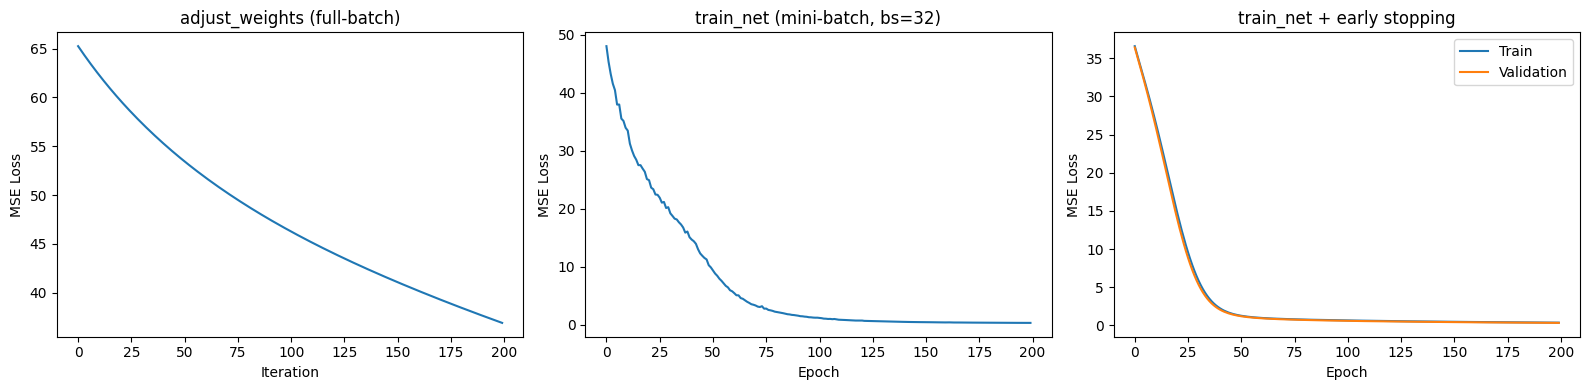

adjust_weights final loss: 36.9189
train_net final loss:      0.3196
train_net+val final loss:  0.3608  (stopped at epoch 200)


In [28]:
n = 1000
d = 4

k = np.random.randint(0,10,(d,1))
x = np.random.normal(0,1,(n,d))
y = np.dot(x,k) + 0.1 + np.random.normal(0,0.01,(n,1))

nn1 = NeuralNet(d, 1, [18, 12])
loss_1 = [nn1.adjust_weights(x, y, learning_rate=0.0001) for _ in range(200)]

nn2 = NeuralNet(d, 1, [18, 12])
loss_2 = nn2.train_net(x, y, batch_size=32, epochs=200, learning_rate=0.0001)

nn3 = NeuralNet(d, 1, [18, 12])
loss_3_train, loss_3_val = nn3.train_net(x, y, batch_size=32, epochs=200, learning_rate=0.0001, use_validation_data=True, patience=15)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].plot(loss_1)
axes[0].set_title("adjust_weights (full-batch)")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("MSE Loss")

axes[1].plot(loss_2)
axes[1].set_title("train_net (mini-batch, bs=32)")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("MSE Loss")

axes[2].plot(loss_3_train, label="Train")
axes[2].plot(loss_3_val, label="Validation")
axes[2].set_title("train_net + early stopping")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("MSE Loss")
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"adjust_weights final loss: {loss_1[-1]:.4f}")
print(f"train_net final loss:      {loss_2[-1]:.4f}")
print(f"train_net+val final loss:  {loss_3_train[-1]:.4f}  (stopped at epoch {len(loss_3_train)})")

### Real test and preprocessing

When using real data and neural networks, it is very important to scale the data between smaller values, usually between 0 and 1. This is because neural networks struggle with larger values as input compared to smaller values. 

To test this, we will use our first dataset and test with and without scaling.

Similar as with assignment 2, we will use the scikit-learn library for this preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

### 8) Dataset 1: Wine - with and without scaling

Read about the Wine dataset: https://archive.ics.uci.edu/dataset/109/wine

Train two neural network, one with scaling and one without. Are we able to see any difference in training results or loss over time?

**Note:** Do not train for to many epochs (more than maybe 50-100). The network might "learn" anyway in the end, but you should still be able to see a difference when training.

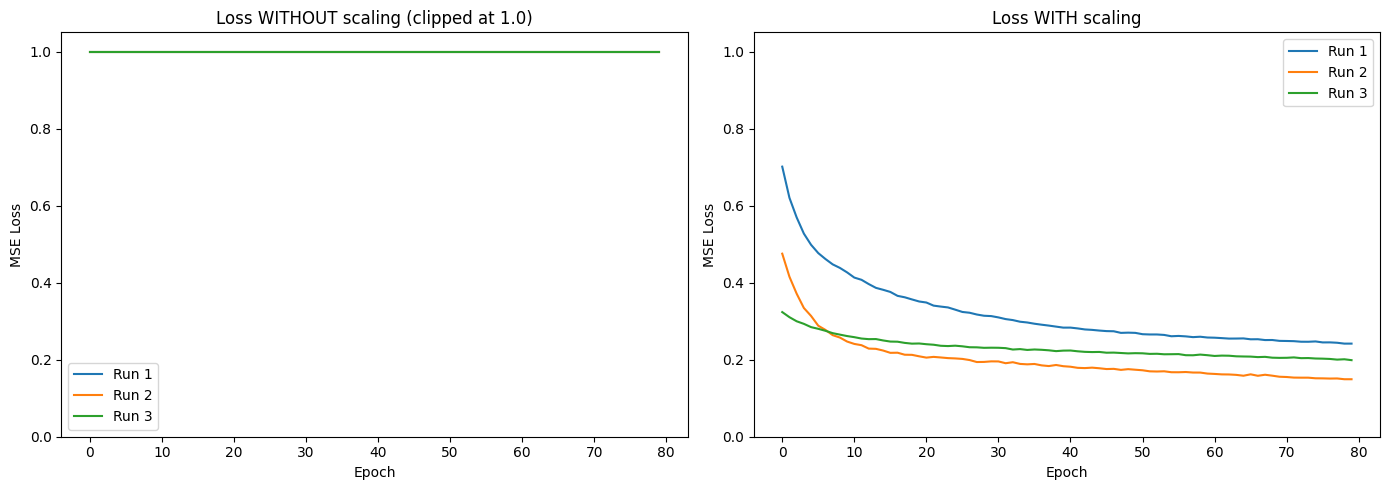

  Run 1 WITHOUT scaling: initial loss = 733832548320454262329966592.00, final loss = 1655889879349919219712.00
  Run 2 WITHOUT scaling: initial loss = 65683723209766322176.00, final loss = 127473417209496.23
  Run 3 WITHOUT scaling: initial loss = 427368980356809490432.00, final loss = 838763307887874.00

Test Accuracy (without scaling): ['40.74%', '22.22%', '25.93%']   mean=29.63%
Test Accuracy (with scaling):    ['29.63%', '75.93%', '79.63%']   mean=61.73%

Without scaling the loss explodes due to large feature values (e.g. proline up to 1680).
Scaling helps the network converge and reach much higher accuracy.


In [29]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data_wine = pd.read_csv("wine.csv", skiprows=[1]).to_numpy().astype(float)

X_wine = data_wine[:, :-1]
y_wine_raw = data_wine[:, -1].astype(int)

n_classes = len(np.unique(y_wine_raw))
y_wine = np.zeros((len(y_wine_raw), n_classes))
y_wine[np.arange(len(y_wine_raw)), y_wine_raw - 1] = 1.0

def accuracy(nn, x, y_onehot):
    preds = nn.forward(x)
    return np.mean(np.argmax(preds, axis=1) == np.argmax(y_onehot, axis=1))

n_runs = 3
epochs = 80
lr = 5e-4
batch_size = 16
neurons = [16, 8]

all_losses_noscale = []
all_losses_scaled  = []
all_acc_noscale    = []
all_acc_scaled     = []

for run in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(
        X_wine, y_wine, test_size=0.3, random_state=run)
    
    scaler = preprocessing.MinMaxScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s  = scaler.transform(X_test)
    
    nn_ns = NeuralNet(X_train.shape[1], n_classes, neurons)
    losses_ns = nn_ns.train_net(X_train, y_train, batch_size=batch_size,
                                 epochs=epochs, learning_rate=lr)
    all_losses_noscale.append(losses_ns)
    all_acc_noscale.append(accuracy(nn_ns, X_test, y_test))
    
    nn_s = NeuralNet(X_train_s.shape[1], n_classes, neurons)
    losses_s = nn_s.train_net(X_train_s, y_train, batch_size=batch_size,
                               epochs=epochs, learning_rate=lr)
    all_losses_scaled.append(losses_s)
    all_acc_scaled.append(accuracy(nn_s, X_test_s, y_test))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
for i, l in enumerate(all_losses_noscale):
    l_clipped = np.minimum(l, 1.0)
    ax.plot(l_clipped, label=f"Run {i+1}")
ax.set_title("Loss WITHOUT scaling (clipped at 1.0)")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE Loss")
ax.set_ylim(0.0, 1.05)
ax.legend()

ax = axes[1]
for i, l in enumerate(all_losses_scaled):
    ax.plot(l, label=f"Run {i+1}")
ax.set_title("Loss WITH scaling")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE Loss")
ax.set_ylim(0.0, 1.05)
ax.legend()

plt.tight_layout()
plt.show()

for i, l in enumerate(all_losses_noscale):
    print(f"  Run {i+1} WITHOUT scaling: initial loss = {l[0]:.2f}, final loss = {l[-1]:.2f}")
print()

print("Test Accuracy (without scaling):", [f"{a:.2%}" for a in all_acc_noscale],
      f"  mean={np.mean(all_acc_noscale):.2%}")
print("Test Accuracy (with scaling):   ", [f"{a:.2%}" for a in all_acc_scaled],
      f"  mean={np.mean(all_acc_scaled):.2%}")
print("\nWithout scaling the loss explodes due to large feature values (e.g. proline up to 1680).")
print("Scaling helps the network converge and reach much higher accuracy.")

## Real data and hyper-parameter tuning

Now we are going to use real data, preprocess it, and do hyper-parameter tuning.

Choose two hyper-parameters to tune to try and achive an even better result. **Each chosen parameter needs to have at least 3 different values**. For example, if we were to choose "epochs" then we could test 10, 50, and 100 (optionally more). 

To better see what each hyper-parameter does to the models performance, we recommend doing a *grid-search* on the two chosen parameters. A grid-search tests how the two parameters interact with eachother. There might be a setting in parameter 1 that in combination with a setting in parameter 2 makes the model perform significantly better, compared to the other combinations. A grid-search test all these combinations.

**IMPORTANT NOTE:** Changing the **number of epochs** can be part of the tuning, but it **does not count** towards the two hyper parameters you choose.

### 9) Dataset 2: Mushroom

Read about the Mushroom dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Mushroom dataset: 8124 samples, 116 features
Train: 6499, Test: 1625
Class distribution: edible=4208, poisonous=3916


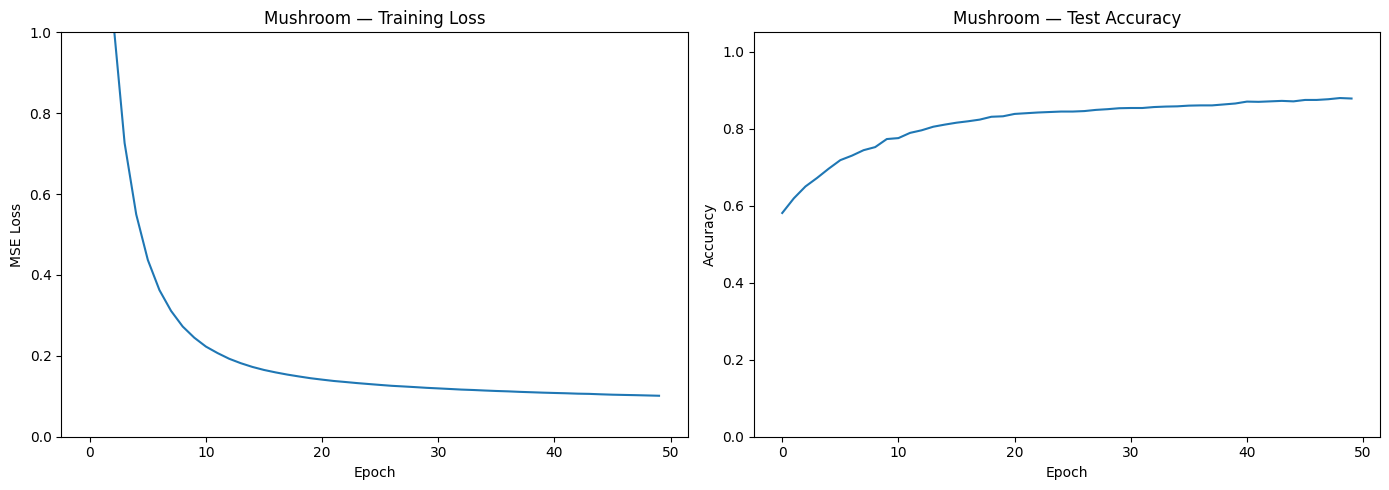

Final test accuracy: 87.82%


In [30]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data_mushroom = pd.read_csv("mushroom.csv")

data_mushroom = data_mushroom.replace('?', np.nan)
for col in data_mushroom.columns:
    if data_mushroom[col].isna().any():
        data_mushroom[col] = data_mushroom[col].fillna(data_mushroom[col].mode()[0])

y_mush_raw = (data_mushroom.iloc[:, 0] == 'p').astype(float).values.reshape(-1, 1)  # 1=poisonous, 0=edible

le = preprocessing.LabelEncoder()
X_mush_encoded = data_mushroom.iloc[:, 1:].apply(le.fit_transform).values.astype(float)

ohe = preprocessing.OneHotEncoder(sparse_output=False)
X_mush = ohe.fit_transform(X_mush_encoded)

scaler = preprocessing.MinMaxScaler()
X_mush = scaler.fit_transform(X_mush)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_mush, y_mush_raw, test_size=0.2, random_state=42)

print(f"Mushroom dataset: {X_mush.shape[0]} samples, {X_mush.shape[1]} features")
print(f"Train: {X_train_m.shape[0]}, Test: {X_test_m.shape[0]}")
print(f"Class distribution: edible={int(np.sum(y_mush_raw==0))}, poisonous={int(np.sum(y_mush_raw==1))}")

def binary_accuracy(nn, x, y):
    preds = nn.forward(x)
    return np.mean((preds > 0.5).astype(float) == y)

nn_mush = NeuralNet(X_train_m.shape[1], 1, [32, 16])
losses_m = nn_mush.train_net(X_train_m, y_train_m, batch_size=64,
                              epochs=50, learning_rate=1e-3)

nn_mush2 = NeuralNet(X_train_m.shape[1], 1, [32, 16])
accs_m = []
losses_m2 = []
for ep in range(50):
    perm = np.random.permutation(len(X_train_m))
    batch_losses = []
    for s in range(0, len(X_train_m), 64):
        batch_losses.append(nn_mush2.adjust_weights(
            X_train_m[perm[s:s+64]], y_train_m[perm[s:s+64]], learning_rate=1e-3))
    losses_m2.append(np.mean(batch_losses))
    accs_m.append(binary_accuracy(nn_mush2, X_test_m, y_test_m))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(losses_m2)
axes[0].set_title("Mushroom — Training Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("MSE Loss")
axes[0].set_ylim(0.0, 1.0)

axes[1].plot(accs_m)
axes[1].set_title("Mushroom — Test Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0.0, 1.05)
plt.tight_layout()
plt.show()

print(f"Final test accuracy: {accs_m[-1]:.2%}")

When hyper-parameter tuning, please write the parameters and network sizes you test here:

* Parameter 1: **learning_rate** — [0.0001, 0.001, 0.005]
* Parameter 2: **batch_size** — [16, 64, 128]

* Neural network sizes: [32, 16]

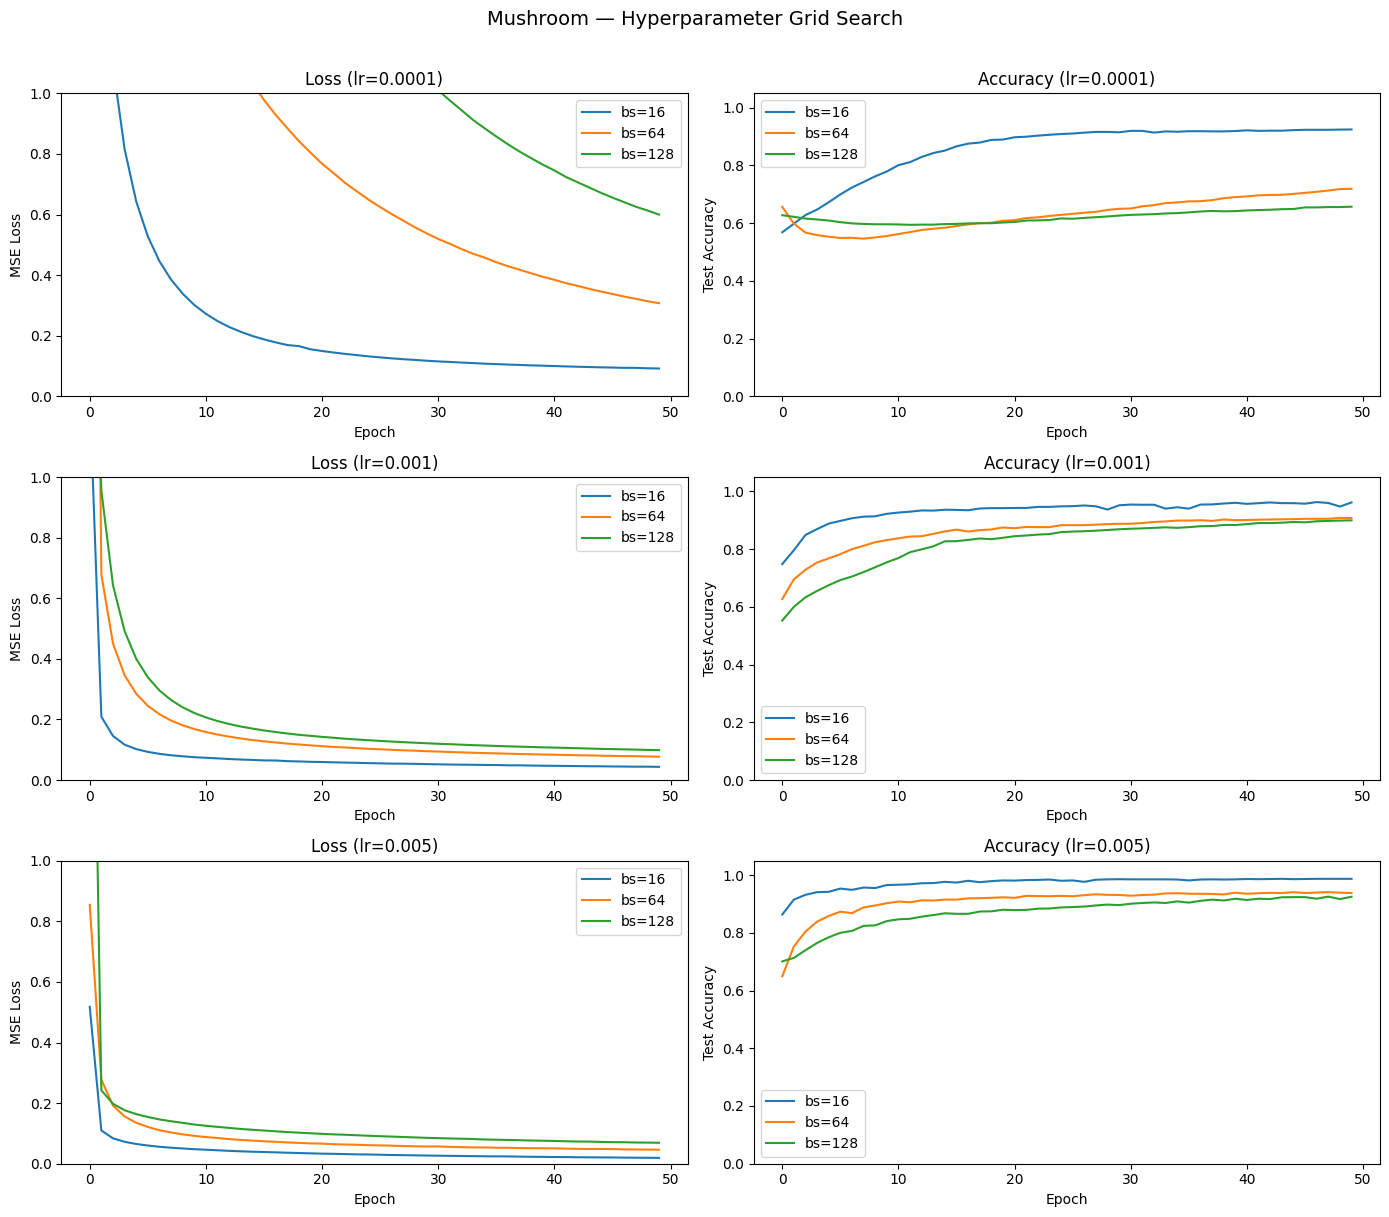

Best config: lr=0.005, batch_size=16
Best test accuracy: 98.71%


In [31]:
learning_rates = [0.0001, 0.001, 0.005]
batch_sizes = [16, 64, 128]
hp_epochs = 50

results_mush = {}

for lr in learning_rates:
    for bs in batch_sizes:
        nn_hp = NeuralNet(X_train_m.shape[1], 1, [32, 16])
        accs_hp = []
        losses_hp = []
        for ep in range(hp_epochs):
            perm = np.random.permutation(len(X_train_m))
            bl = []
            for s in range(0, len(X_train_m), bs):
                bl.append(nn_hp.adjust_weights(
                    X_train_m[perm[s:s+bs]], y_train_m[perm[s:s+bs]], learning_rate=lr))
            losses_hp.append(np.mean(bl))
            accs_hp.append(binary_accuracy(nn_hp, X_test_m, y_test_m))
        results_mush[(lr, bs)] = {"losses": losses_hp, "accs": accs_hp}

fig, axes = plt.subplots(len(learning_rates), 2, figsize=(14, 4 * len(learning_rates)))

for i, lr in enumerate(learning_rates):
    for bs in batch_sizes:
        r = results_mush[(lr, bs)]
        axes[i, 0].plot(r["losses"], label=f"bs={bs}")
        axes[i, 1].plot(r["accs"], label=f"bs={bs}")
    axes[i, 0].set_title(f"Loss (lr={lr})")
    axes[i, 0].set_xlabel("Epoch")
    axes[i, 0].set_ylabel("MSE Loss")
    axes[i, 0].set_ylim(0.0, 1.0)
    axes[i, 0].legend()
    axes[i, 1].set_title(f"Accuracy (lr={lr})")
    axes[i, 1].set_xlabel("Epoch")
    axes[i, 1].set_ylabel("Test Accuracy")
    axes[i, 1].set_ylim(0.0, 1.05)
    axes[i, 1].legend()

plt.suptitle("Mushroom — Hyperparameter Grid Search", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

best_key = max(results_mush, key=lambda k: results_mush[k]["accs"][-1])
print(f"Best config: lr={best_key[0]}, batch_size={best_key[1]}")
print(f"Best test accuracy: {results_mush[best_key]['accs'][-1]:.2%}")

### 10) Dataset 3: Adult

Read about the Adult dataset: https://archive.ics.uci.edu/dataset/2/adult

**IMPORTANT NOTE:** This dataset is much larger than the previous two (48843 instances). If your code runs slow on your own computer, either run this on the compute-server, or you may exclude parts of this dataset. But you must keep a minimum of 10000 datapoints.

Adult dataset: 15000 samples, 105 features
Train: 12000, Test: 3000
Class distribution: <=50K=11422, >50K=3578


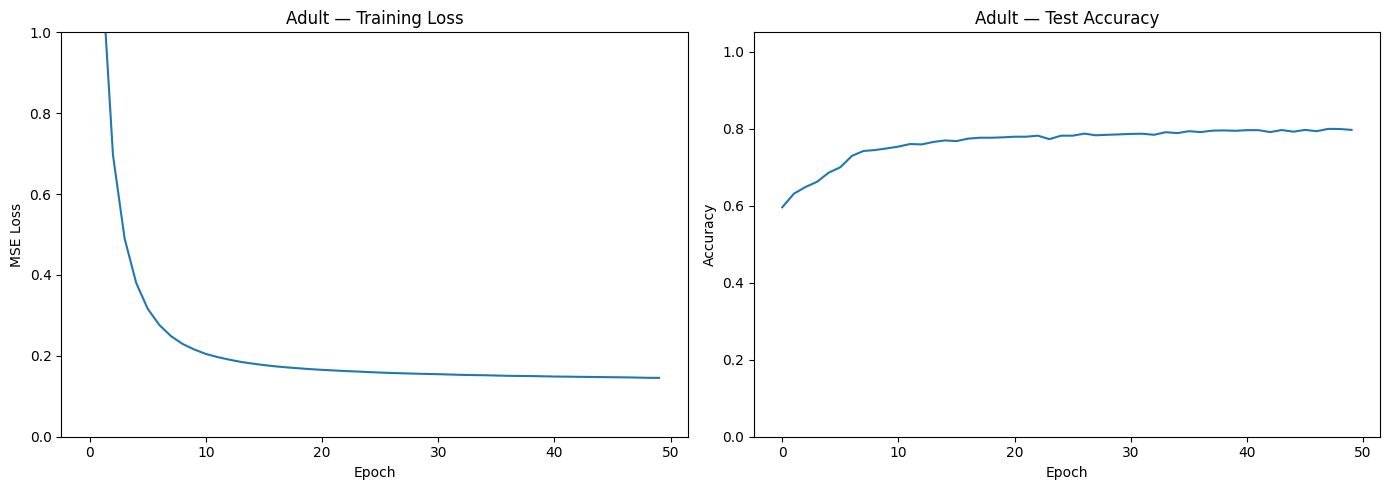

Final test accuracy: 79.67%


In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data_adult = pd.read_csv("adult.csv")

data_adult = data_adult.replace('?', np.nan)
for col in data_adult.columns:
    if data_adult[col].isna().any():
        data_adult[col] = data_adult[col].fillna(data_adult[col].mode()[0])

y_adult = (data_adult['income'].str.strip() == '>50K').astype(float).values.reshape(-1, 1)

X_adult_df = data_adult.drop(columns=['income'])

num_cols = X_adult_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_adult_df.select_dtypes(include=['object']).columns.tolist()

le = preprocessing.LabelEncoder()
X_cat = X_adult_df[cat_cols].apply(le.fit_transform).values.astype(float)
ohe = preprocessing.OneHotEncoder(sparse_output=False)
X_cat_ohe = ohe.fit_transform(X_cat)

X_num = X_adult_df[num_cols].values.astype(float)

X_adult = np.hstack([X_num, X_cat_ohe])

subset_idx = np.random.choice(len(X_adult), size=min(15000, len(X_adult)), replace=False)
X_adult_sub = X_adult[subset_idx]
y_adult_sub = y_adult[subset_idx]

scaler = preprocessing.MinMaxScaler()
X_adult_sub = scaler.fit_transform(X_adult_sub)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_adult_sub, y_adult_sub, test_size=0.2, random_state=42)

print(f"Adult dataset: {X_adult_sub.shape[0]} samples, {X_adult_sub.shape[1]} features")
print(f"Train: {X_train_a.shape[0]}, Test: {X_test_a.shape[0]}")
print(f"Class distribution: <=50K={int(np.sum(y_adult_sub==0))}, >50K={int(np.sum(y_adult_sub==1))}")

nn_adult = NeuralNet(X_train_a.shape[1], 1, [64, 32])
accs_a = []
losses_a = []
for ep in range(50):
    perm = np.random.permutation(len(X_train_a))
    bl = []
    for s in range(0, len(X_train_a), 64):
        bl.append(nn_adult.adjust_weights(
            X_train_a[perm[s:s+64]], y_train_a[perm[s:s+64]], learning_rate=1e-3))
    losses_a.append(np.mean(bl))
    accs_a.append(binary_accuracy(nn_adult, X_test_a, y_test_a))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(losses_a)
axes[0].set_title("Adult — Training Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("MSE Loss")
axes[0].set_ylim(0.0, 1.0)

axes[1].plot(accs_a)
axes[1].set_title("Adult — Test Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0.0, 1.05)
plt.tight_layout()
plt.show()

print(f"Final test accuracy: {accs_a[-1]:.2%}")

When hyper-parameter tuning, please write the parameters and network sizes you test here:

* Parameter 1: **learning_rate** — [0.0005, 0.001, 0.005]
* Parameter 2: **batch_size** — [32, 64, 128]

* Neural network sizes: [64, 32]

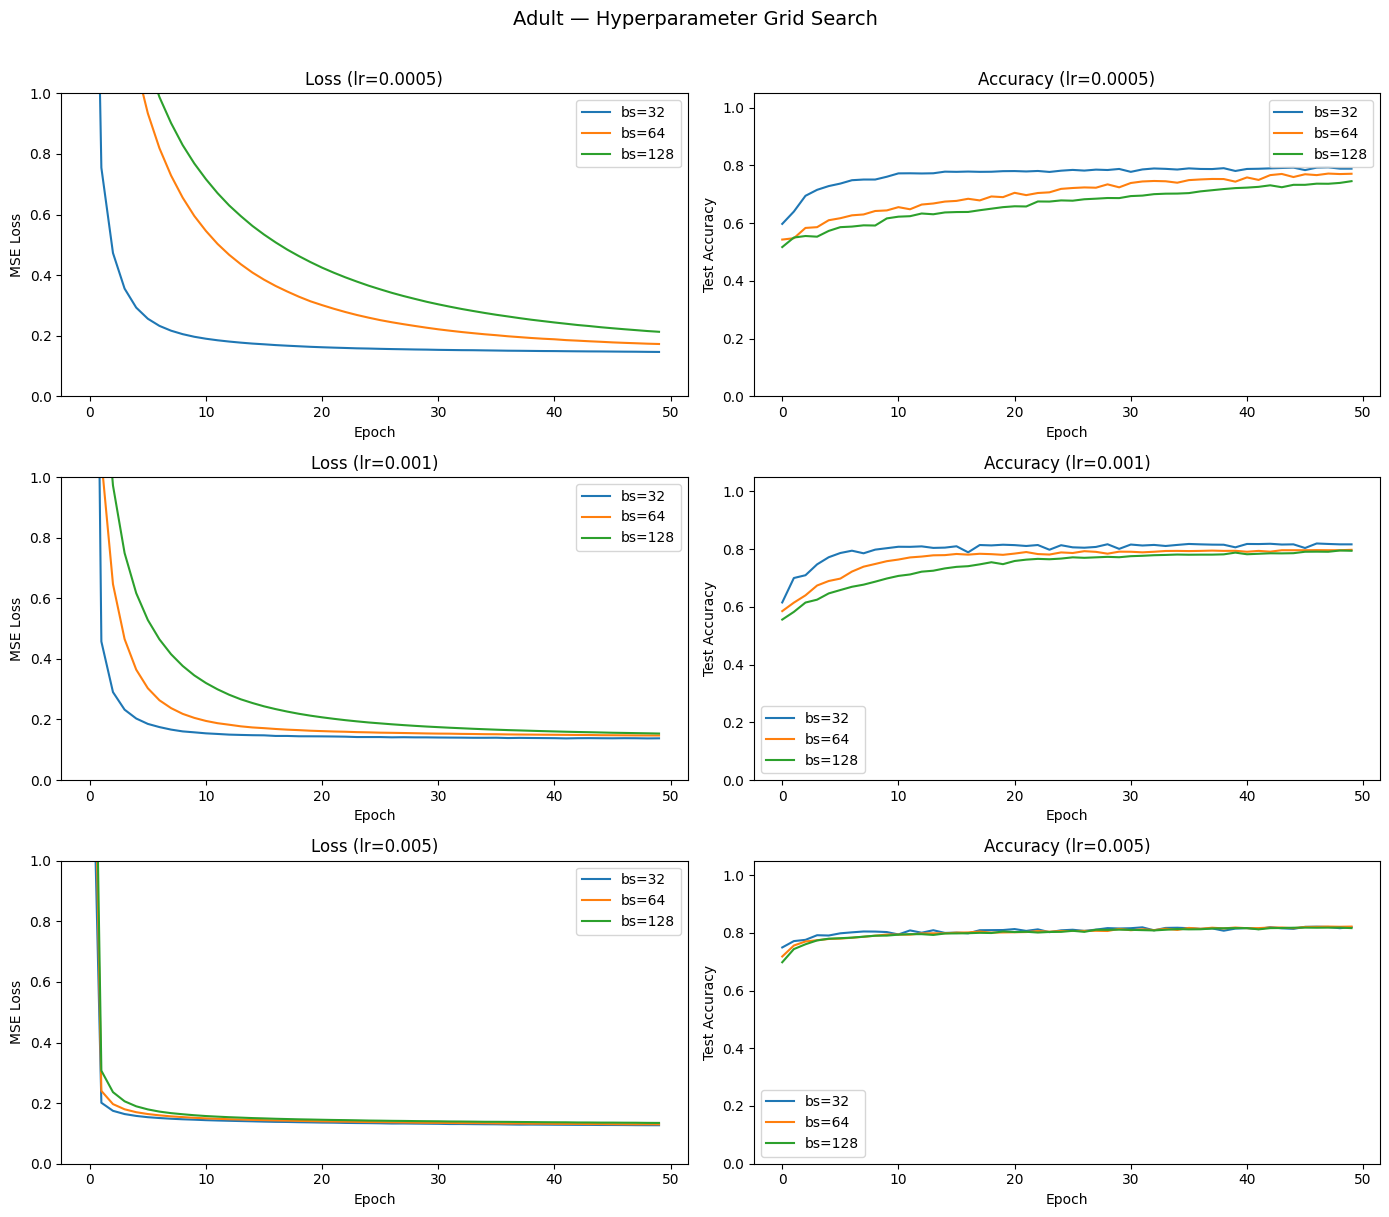

Best config: lr=0.005, batch_size=64
Best test accuracy: 82.17%


In [33]:
learning_rates_a = [0.0005, 0.001, 0.005]
batch_sizes_a = [32, 64, 128]
hp_epochs_a = 50

results_adult = {}

for lr in learning_rates_a:
    for bs in batch_sizes_a:
        nn_hp = NeuralNet(X_train_a.shape[1], 1, [64, 32])
        accs_hp = []
        losses_hp = []
        for ep in range(hp_epochs_a):
            perm = np.random.permutation(len(X_train_a))
            bl = []
            for s in range(0, len(X_train_a), bs):
                bl.append(nn_hp.adjust_weights(
                    X_train_a[perm[s:s+bs]], y_train_a[perm[s:s+bs]], learning_rate=lr))
            losses_hp.append(np.mean(bl))
            accs_hp.append(binary_accuracy(nn_hp, X_test_a, y_test_a))
        results_adult[(lr, bs)] = {"losses": losses_hp, "accs": accs_hp}

fig, axes = plt.subplots(len(learning_rates_a), 2, figsize=(14, 4 * len(learning_rates_a)))

for i, lr in enumerate(learning_rates_a):
    for bs in batch_sizes_a:
        r = results_adult[(lr, bs)]
        axes[i, 0].plot(r["losses"], label=f"bs={bs}")
        axes[i, 1].plot(r["accs"], label=f"bs={bs}")
    axes[i, 0].set_title(f"Loss (lr={lr})")
    axes[i, 0].set_xlabel("Epoch")
    axes[i, 0].set_ylabel("MSE Loss")
    axes[i, 0].set_ylim(0.0, 1.0)
    axes[i, 0].legend()
    axes[i, 1].set_title(f"Accuracy (lr={lr})")
    axes[i, 1].set_xlabel("Epoch")
    axes[i, 1].set_ylabel("Test Accuracy")
    axes[i, 1].set_ylim(0.0, 1.05)
    axes[i, 1].legend()

plt.suptitle("Adult — Hyperparameter Grid Search", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

best_key = max(results_adult, key=lambda k: results_adult[k]["accs"][-1])
print(f"Best config: lr={best_key[0]}, batch_size={best_key[1]}")
print(f"Best test accuracy: {results_adult[best_key]['accs'][-1]:.2%}")

# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why would we want to use different activation functions?

2) Why would we want to use different loss functions?

3) Why are neural networks sensitive to large input values?

4) What is the role of the bias? 

5) What is the purpose of hyper-parameter tuning?

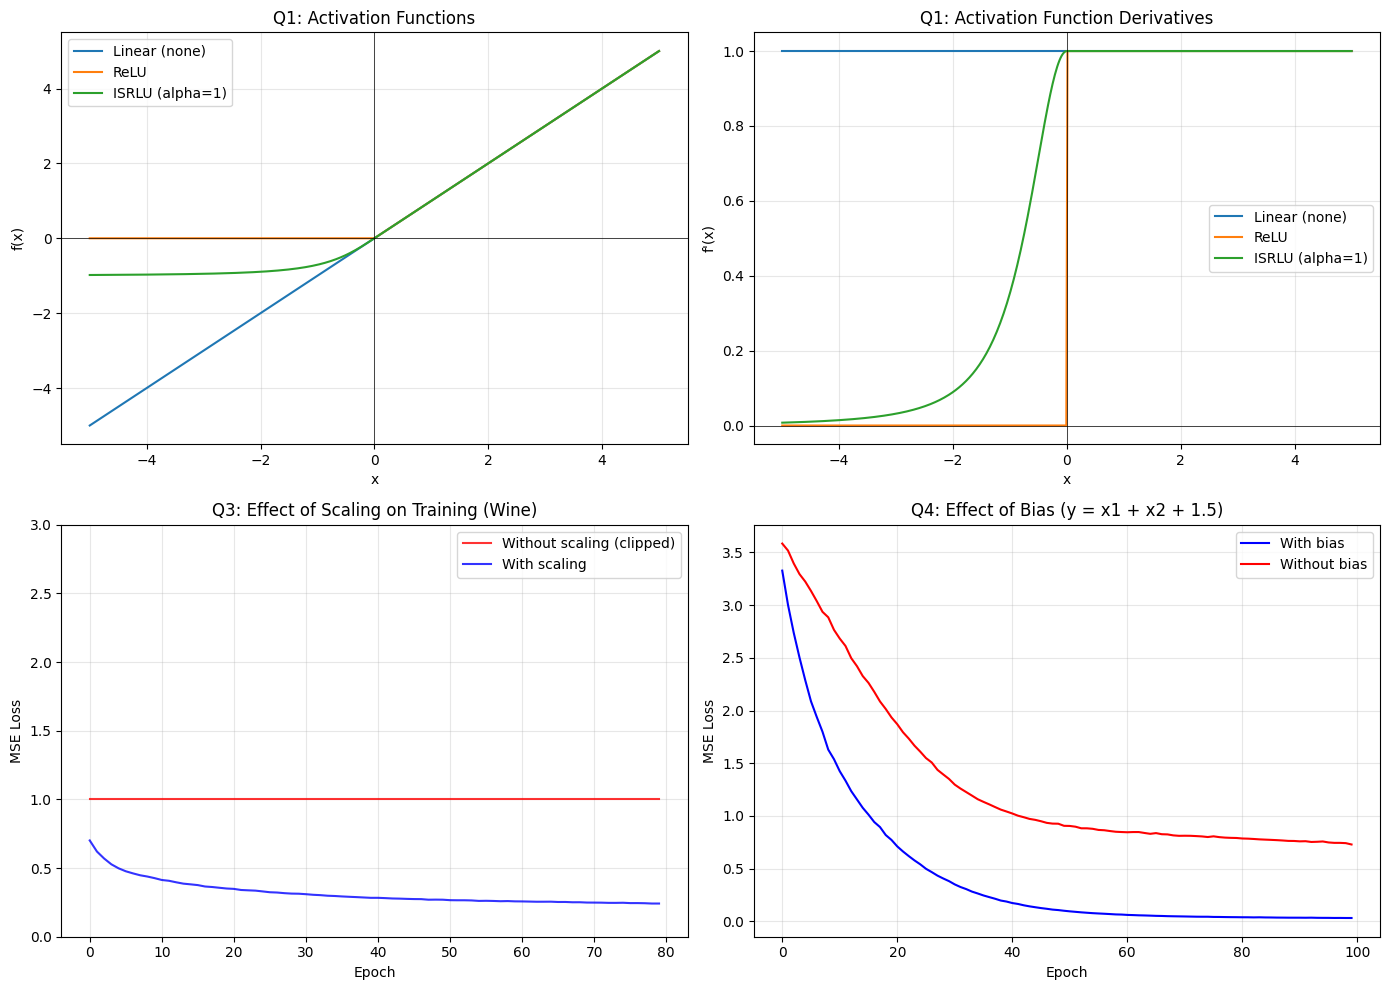

In [36]:
x_range = np.linspace(-5, 5, 500)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Q1: Activation functions comparison
ax = axes[0, 0]
ax.plot(x_range, activate(x_range, "none"), label="Linear (none)")
ax.plot(x_range, activate(x_range, "relu"), label="ReLU")
ax.plot(x_range, activate(x_range, "isrlu"), label="ISRLU (alpha=1)")
ax.set_title("Q1: Activation Functions")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

# Q1: Activation function derivatives
ax = axes[0, 1]
ax.plot(x_range, d_activate(x_range, "none"), label="Linear (none)")
ax.plot(x_range, d_activate(x_range, "relu"), label="ReLU")
ax.plot(x_range, d_activate(x_range, "isrlu"), label="ISRLU (alpha=1)")
ax.set_title("Q1: Activation Function Derivatives")
ax.set_xlabel("x")
ax.set_ylabel("f'(x)")
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

# Q3: Effect of scaling — reuse wine results (clip unscaled at 1.0)
ax = axes[1, 0]
ax.plot(np.minimum(all_losses_noscale[0], 1.0), label="Without scaling (clipped)", color="red", alpha=0.8)
ax.plot(all_losses_scaled[0], label="With scaling", color="blue", alpha=0.8)
ax.set_title("Q3: Effect of Scaling on Training (Wine)")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE Loss")
ax.set_ylim(0.0, 3.0)
ax.legend()
ax.grid(True, alpha=0.3)

# Q4: Effect of bias — train with and without bias
n_demo = 500
x_demo = np.random.normal(0, 1, (n_demo, 2))
y_demo = (x_demo[:, 0] + x_demo[:, 1] + 1.5).reshape(-1, 1)

nn_with_bias = NeuralNet(2, 1, [8])
loss_with = nn_with_bias.train_net(x_demo, y_demo, batch_size=32, epochs=100, learning_rate=1e-3)

nn_no_bias = NeuralNet(2, 1, [8])
for b in nn_no_bias.biases:
    b[:] = 0
loss_without = []
for ep in range(100):
    perm = np.random.permutation(n_demo)
    bl = []
    for s in range(0, n_demo, 32):
        act = x_demo[perm[s:s+32]]
        act_hist = []
        for w, b, af in zip(nn_no_bias.weights, nn_no_bias.biases, nn_no_bias.activation_functions):
            act_hist.append(act)
            act = propagate_forward(w, act, np.zeros_like(b), af)
        bl.append(MSE_loss(act, y_demo[perm[s:s+32]]))
        d_act = d_MSE_loss(act, y_demo[perm[s:s+32]])
        for w, b, af, pa in reversed(list(zip(nn_no_bias.weights, nn_no_bias.biases,
                                                nn_no_bias.activation_functions, act_hist))):
            dw, d_act, db = propagate_backward(w, pa, np.zeros_like(b), d_act, af)
            w -= 1e-3 * dw
    loss_without.append(np.mean(bl))

ax = axes[1, 1]
ax.plot(loss_with, label="With bias", color="blue")
ax.plot(loss_without, label="Without bias", color="red")
ax.set_title("Q4: Effect of Bias (y = x1 + x2 + 1.5)")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE Loss")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!